In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel("C:/Users/LENOVO/Desktop/Patient-Satisfaction-and-Characteristics-in-Psychiatric-Hospitals-2017-1/data/raw/satisfaction-hosp-psychiatry-2017.xls")
df.head()

,SurveyCode,id,bet,bet1,kampus,kodkampus,migdar,machlaka,sugmigdar,mixed,...,q75y,q76y,q77y,HAATZAMAPER,MEIDALATPER,PEILUTPER,RETZEFPER,TNAYMPER,YACHASPER,year
0,מס סקר,מס' רשומה,בית חולים,בית חולים,קמפוס,קמפוס,מגדר המטופל,שם המחלקה,האם המחלקה היא לגברים או נשים,סוג מחלקה,...,האם במהלך האשפוז הרגשת מוגן ובטוח ?,האם הרגשת שפעילויות גופניות הן חלק משגרת היום ...,האם בזמן ההגבלה קיבלת מענה לצרכים הבסיסיים שלך...,העצמת המטופל,מתן מידע ובהירות ההסברים,מגוון פעילויות,הכנה לשחרור ורצף הטיפול,תנאים פיזיים,יחס וכבוד למטופל,NaN
1,2,129600,באר שבע,4,,NaN,2,מיון והשהיה,מעורבת,1,...,1,1,NaN,1,1,1,0.75,1,1,2016.0
2,2,129602,באר שבע,4,,NaN,1,מיון והשהיה,מעורבת,1,...,1,1,NaN,0.8,0.75,0.666667,0,1,1,2016.0
3,2,129603,באר שבע,4,,NaN,2,מיון והשהיה,מעורבת,1,...,1,1,NaN,0.8,0.5,0.666667,0.333333,0.833333,1,2016.0
4,2,129605,באר שבע,4,,NaN,1,מיון והשהיה,מעורבת,1,...,1,1,NaN,1,1,1,0.75,1,1,2016.0


### Column Removal Explanation
#### Several columns were removed during data preprocessing for the following reasons:
```
Duplicates: Columns with identical or redundant information.
Names Instead of Codes: Replaced text-based columns with numeric codes for consistency.
Empty Columns: Columns with too many missing values were excluded.
Irrelevant Data: Columns deemed unrelated to the project's objectives.
Unclear Meaning: Columns without clear documentation or context.
```

In [3]:
columns_to_drop = ["q17", "q32", "q35", "q36", "SurveyCode", "bet", "kampus", "tarich", "q45", "madad1", "q46", "date", 
                   "Q36y", "q17y", "q44_1", "w_bet1",
                   "madad2", "madad3", "madad4", "madad5", "madad6", "madad7", "madad8", "madad9", "district", 
                   "case_manager", "total", "median_age", "q3y", "q4y", "q6y", "q7y", "q8y", "q10y", "q15y", "q19y", "q20y", 
                   "q22y", "q5y", "q9y","q16y", "q24y", "q25y", "q26y", "q27y", "q28y", "q29y", "q18y", "q30y", "q33y", "q34y", 
                   "q35y", "q36t", "Q1y", "q1t", "q2_1", "q21y", "q23y", "q12y", "q13y", "q14y", "q2_1y", "q77", "q71y", "q72y", 
                   "q73y", "q74y", "q75y", "q76y", "q77y", "HAATZAMAPER", "MEIDALATPER", "PEILUTPER", "RETZEFPER", "TNAYMPER", 
                   "YACHASPER", "year"]

df = df.drop(columns= columns_to_drop)
df = df.iloc[1: , ]
df.head()

,id,bet1,kodkampus,migdar,machlaka,sugmigdar,mixed,sug,q1,q2,...,mitot,q117,q135,q136,q71,q72,q73,q74,q75,q76
1,129600,4,NaN,2,מיון והשהיה,מעורבת,1,1,10,4,...,298,1,1,10,1,1,1,1,1,1
2,129602,4,NaN,1,מיון והשהיה,מעורבת,1,1,8,1,...,298,2,2,9,2,1,5,1,1,2
3,129603,4,NaN,2,מיון והשהיה,מעורבת,1,1,8,1,...,298,2,4,10,2,4,1,2,1,2
4,129605,4,NaN,1,מיון והשהיה,מעורבת,1,1,10,1,...,298,1,1,10,1,1,2,1,1,1
5,129606,4,NaN,1,מיון והשהיה,מעורבת,1,1,9,1,...,298,1,1,9,2,1,1,2,1,2


#### Missing Values

In [4]:
def missing_values_summary(df):
    missing_summary = df.isnull().sum()  # מחשב את מספר ה-NaN בכל עמודה
    missing_summary = missing_summary[missing_summary > 0]  # מסנן רק עמודות עם ערכים חסרים
    return missing_summary.sort_values(ascending=False)  # מחזיר בסדר יורד

missing_summary = missing_values_summary(df)
print(missing_summary)

kodkampus     881
q11_1         242
q41            11
q42            11
q38             9
zeman           8
sector          5
yamim           1
hosp_time       1
hosp_time1      1
dtype: int64


In [5]:
df.loc[df['kodkampus'] == 1, 'bet1'] = 3
df.loc[df['kodkampus'] == 2, 'bet1'] = 12
df.loc[df['kodkampus'] == 3, 'bet1'] = 2
df.loc[df['kodkampus'] == 4, 'bet1'] = 13

# לאחר שטיפלנו בעמודת קמפוס ניתן להסיר אותה ולהישאר רק עם עמודת בית חולים (bet1)
df = df.drop(columns= "kodkampus")
df.head()


,id,bet1,migdar,machlaka,sugmigdar,mixed,sug,q1,q2,q3,...,mitot,q117,q135,q136,q71,q72,q73,q74,q75,q76
1,129600,4,2,מיון והשהיה,מעורבת,1,1,10,4,1,...,298,1,1,10,1,1,1,1,1,1
2,129602,4,1,מיון והשהיה,מעורבת,1,1,8,1,2,...,298,2,2,9,2,1,5,1,1,2
3,129603,4,2,מיון והשהיה,מעורבת,1,1,8,1,2,...,298,2,4,10,2,4,1,2,1,2
4,129605,4,1,מיון והשהיה,מעורבת,1,1,10,1,1,...,298,1,1,10,1,1,2,1,1,1
5,129606,4,1,מיון והשהיה,מעורבת,1,1,9,1,2,...,298,1,1,9,2,1,1,2,1,2


In [6]:
def missing_values_summary(df):
    missing_summary = df.isnull().sum()  # מחשב את מספר ה-NaN בכל עמודה
    missing_summary = missing_summary[missing_summary > 0]  # מסנן רק עמודות עם ערכים חסרים
    return missing_summary.sort_values(ascending=False)  # מחזיר בסדר יורד

missing_summary = missing_values_summary(df)
print(missing_summary)

q11_1         242
q41            11
q42            11
q38             9
zeman           8
sector          5
yamim           1
hosp_time       1
hosp_time1      1
dtype: int64


##### מילוי 0 היכן שקיים ערך חסר אך בעמודה הקודמת יש ערך של 1 (מצביע על כך שלא היה מטפל אישי) 

In [7]:
df.loc[df['q11'] == 1, 'q11_1'] = 0
df.loc[df['q11_1'].isnull(), ['q11','q11_1']]



,q11,q11_1
292,2,NaN
301,2,NaN
533,2,NaN
1010,2,NaN
1012,2,NaN


##### חישוב התפלגות של הנתונים לטובת מילוי הערכים החסרים בעמודה

In [8]:
# חיתוך הדאטה כדי לא לכלול את 0 ואת שם העמודה
df_dist = df.loc[df["q11_1"] != 0]

# שם העמודה
column_name = "q11_1"

# חישוב התפלגות הערכים הקיימים בעמודה (לא כוללים ערכים חסרים)
distribution = df_dist[column_name].value_counts(normalize=True)  # התפלגות באחוזים

# חישוב מספר הערכים החסרים בעמודה
num_missing = df_dist[column_name].isna().sum()
print(f"Number of missing values: {num_missing}")

# חישוב מספר השורות שצריכות להתמלא לכל ערך לפי ההתפלגות
values_to_fill = (distribution * num_missing).round().astype(int)  # עיגול למספר שלם

# הצגת מספר הערכים שיתווספו לכל קטגוריה
print("\nValues to fill for each category:")
print(values_to_fill)

# ודא שסך כל השורות מתמלא
difference = num_missing - values_to_fill.sum()
if difference > 0:
    # הוסף את ההפרש לערך הנפוץ ביותר
    most_common_value = values_to_fill.idxmax()
    values_to_fill[most_common_value] += difference

print(distribution)
print("\nAdjusted values to fill (if necessary):")
print(values_to_fill)


Number of missing values: 5

Values to fill for each category:
q11_1
4    2
3    1
1    1
2    1
5    0
Name: proportion, dtype: int64
q11_1
4    0.446835
3    0.193671
1    0.175949
2    0.174684
5    0.008861
Name: proportion, dtype: float64

Adjusted values to fill (if necessary):
q11_1
4    2
3    1
1    1
2    1
5    0
Name: proportion, dtype: int64


##### מילוי הערכים החסרים על פי נתוני ההתפלגות שחישבנו קודם לכן

In [9]:
# התפלגות הערכים שצריכים להתמלא (לדוגמה: נוצר מחישוב התפלגות)
values_to_fill = {
    "4": 2,  # למלא 2 ערכים ב-"4"
    "3": 1,  # למלא ערך אחד  ב-"3"
    "1": 1,   
    "2": 1
}

# מציאת האינדקסים של השורות החסרות
missing_indices = df[df[column_name].isna()].index
print(missing_indices)

# יצירת רשימה של הערכים למילוי על בסיס ההתפלגות
fill_values = []
for value, count in values_to_fill.items():
    fill_values.extend([value] * count)
print(fill_values)

# וידוא התאמה בין מספר השורות למלא לכמות הערכים
if len(fill_values) != len(missing_indices):
    raise ValueError("The number of missing rows does not match the distribution of fill values.")

# מילוי השורות החסרות בערכים
df.loc[missing_indices, column_name] = fill_values

Index([292, 301, 533, 1010, 1012], dtype='int64')
['4', '4', '3', '1', '2']


In [10]:
def missing_values_summary(df):
    missing_summary = df.isnull().sum()  # מחשב את מספר ה-NaN בכל עמודה
    missing_summary = missing_summary[missing_summary > 0]  # מסנן רק עמודות עם ערכים חסרים
    return missing_summary.sort_values(ascending=False)  # מחזיר בסדר יורד

missing_summary = missing_values_summary(df)
print(missing_summary)

q41           11
q42           11
q38            9
zeman          8
sector         5
yamim          1
hosp_time      1
hosp_time1     1
dtype: int64


In [11]:
# שם העמודה
column_name = "q41"

# חישוב התפלגות הערכים הקיימים בעמודה (לא כוללים ערכים חסרים)
distribution = df[column_name].value_counts(normalize=True)  # התפלגות באחוזים

# חישוב מספר הערכים החסרים בעמודה
num_missing = df[column_name].isna().sum()
print(f"Number of missing values: {num_missing}")

# חישוב מספר השורות שצריכות להתמלא לכל ערך לפי ההתפלגות
values_to_fill = (distribution * num_missing).round().astype(int)  # עיגול למספר שלם

# ודא שסך כל השורות מתמלא
difference = num_missing - values_to_fill.sum()
if difference > 0:
    # הוסף את ההפרש לערך הנפוץ ביותר
    most_common_value = values_to_fill.idxmax()
    values_to_fill[most_common_value] += difference

print(distribution)
print("\nAdjusted values to fill (if necessary):")
print(values_to_fill)




Number of missing values: 11
q41
1    0.682664
3    0.120470
2    0.058766
4    0.050930
8    0.046033
9    0.035260
7    0.005877
Name: proportion, dtype: float64

Adjusted values to fill (if necessary):
q41
1    8
3    1
2    1
4    1
8    1
9    0
7    0
Name: proportion, dtype: int64


In [12]:
# התפלגות הערכים שצריכים להתמלא (לדוגמה: נוצר מחישוב התפלגות)
column_name = "q41"

values_to_fill = {
    "1": 7,  # למלא 7 ערכים ב-"1"
    "3": 1,  # למלא ערך אחד  ב-"3"
    "2": 1,   
    "4": 1,
    "8": 1
}

# מציאת האינדקסים של השורות החסרות
missing_indices = df[df[column_name].isna()].index
print(missing_indices)

# יצירת רשימה של הערכים למילוי על בסיס ההתפלגות
fill_values = []
for value, count in values_to_fill.items():
    fill_values.extend([value] * count)
print(fill_values)

# וידוא התאמה בין מספר השורות למלא לכמות הערכים
if len(fill_values) != len(missing_indices):
    raise ValueError("The number of missing rows does not match the distribution of fill values.")

# מילוי השורות החסרות בערכים
df.loc[missing_indices, column_name] = fill_values

Index([230, 429, 528, 539, 610, 650, 770, 787, 951, 959, 1032], dtype='int64')
['1', '1', '1', '1', '1', '1', '1', '3', '2', '4', '8']


In [13]:
# שם העמודה
column_name = "q42"

# חישוב התפלגות הערכים הקיימים בעמודה (לא כוללים ערכים חסרים)
distribution = df[column_name].value_counts(normalize=True)  # התפלגות באחוזים

# חישוב מספר הערכים החסרים בעמודה
num_missing = df[column_name].isna().sum()
print(f"Number of missing values: {num_missing}")

# חישוב מספר השורות שצריכות להתמלא לכל ערך לפי ההתפלגות
values_to_fill = (distribution * num_missing).round().astype(int)  # עיגול למספר שלם

# ודא שסך כל השורות מתמלא
difference = num_missing - values_to_fill.sum()
if difference > 0:
    # הוסף את ההפרש לערך הנפוץ ביותר
    most_common_value = values_to_fill.idxmax()
    values_to_fill[most_common_value] += difference

print(distribution)
print("\nAdjusted values to fill (if necessary):")
print(values_to_fill)




Number of missing values: 11
q42
1    0.729677
2    0.270323
Name: proportion, dtype: float64

Adjusted values to fill (if necessary):
q42
1    8
2    3
Name: proportion, dtype: int64


In [14]:
# התפלגות הערכים שצריכים להתמלא (לדוגמה: נוצר מחישוב התפלגות)
column_name = "q42"
values_to_fill = {
    "1": 8,  # למלא 8 ערכים ב-"1"
    "2": 3,  
}

# מציאת האינדקסים של השורות החסרות
missing_indices = df[df[column_name].isna()].index
print(missing_indices)

# יצירת רשימה של הערכים למילוי על בסיס ההתפלגות
fill_values = []
for value, count in values_to_fill.items():
    fill_values.extend([value] * count)
print(fill_values)

# וידוא התאמה בין מספר השורות למלא לכמות הערכים
if len(fill_values) != len(missing_indices):
    raise ValueError("The number of missing rows does not match the distribution of fill values.")

# מילוי השורות החסרות בערכים
df.loc[missing_indices, column_name] = fill_values

Index([76, 187, 256, 378, 535, 562, 570, 650, 770, 826, 881], dtype='int64')
['1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2']


In [15]:
# שם העמודה
column_name = "sector"

# חישוב התפלגות הערכים הקיימים בעמודה (לא כוללים ערכים חסרים)
distribution = df[column_name].value_counts(normalize=True)  # התפלגות באחוזים

# חישוב מספר הערכים החסרים בעמודה
num_missing = df[column_name].isna().sum()
print(f"Number of missing values: {num_missing}")

# חישוב מספר השורות שצריכות להתמלא לכל ערך לפי ההתפלגות
values_to_fill = (distribution * num_missing).round().astype(int)  # עיגול למספר שלם

# ודא שסך כל השורות מתמלא
difference = num_missing - values_to_fill.sum()
if difference > 0:
    # הוסף את ההפרש לערך הנפוץ ביותר
    most_common_value = values_to_fill.idxmax()
    values_to_fill[most_common_value] += difference

print(distribution)
print("\nAdjusted values to fill (if necessary):")
print(values_to_fill)

Number of missing values: 5
sector
1    0.798442
4    0.110029
3    0.091529
Name: proportion, dtype: float64

Adjusted values to fill (if necessary):
sector
1    4
4    1
3    0
Name: proportion, dtype: int64


In [16]:
# התפלגות הערכים שצריכים להתמלא (לדוגמה: נוצר מחישוב התפלגות)
column_name = "sector"
values_to_fill = {
    "1": 4, 
    "4": 1, 
}

# מציאת האינדקסים של השורות החסרות
missing_indices = df[df[column_name].isna()].index
print(missing_indices)

# יצירת רשימה של הערכים למילוי על בסיס ההתפלגות
fill_values = []
for value, count in values_to_fill.items():
    fill_values.extend([value] * count)
print(fill_values)

# וידוא התאמה בין מספר השורות למלא לכמות הערכים
if len(fill_values) != len(missing_indices):
    raise ValueError("The number of missing rows does not match the distribution of fill values.")

# מילוי השורות החסרות בערכים
df.loc[missing_indices, column_name] = fill_values

Index([299, 449, 770, 782, 1032], dtype='int64')
['1', '1', '1', '1', '4']


In [17]:
def missing_values_summary(df):
    missing_summary = df.isnull().sum()  # מחשב את מספר ה-NaN בכל עמודה
    missing_summary = missing_summary[missing_summary > 0]  # מסנן רק עמודות עם ערכים חסרים
    return missing_summary.sort_values(ascending=False)  # מחזיר בסדר יורד

missing_summary = missing_values_summary(df)
print(missing_summary)

q38           9
zeman         8
yamim         1
hosp_time     1
hosp_time1    1
dtype: int64


#### טיפול בעמודת hosp_time

In [18]:
df = df.dropna(subset=['hosp_time'])

#### טיפול בעמודת MIXED

In [19]:
df.loc[df['sugmigdar'] == "גברים", 'mixed'] = 1
df.loc[df['sugmigdar'] == "נשים", 'mixed'] = 2
df.loc[df['sugmigdar'] == "מעורבת", 'mixed'] = 3



#### מילוי ערכים חסרים בעמודות q38, zeman

In [20]:
def fill_missing_by_gender(df, columns_to_fill, gender_column='migdar'):

       for column in columns_to_fill:
  
        medians = df.groupby(gender_column)[column].median()
        
        df[column] = df.apply(
            lambda row: medians[row[gender_column]] if np.isnan(row[column]) else row[column],
            axis=1)
        return df
       
df = fill_missing_by_gender(df, columns_to_fill=['q38'], gender_column='migdar')

In [21]:
df['zeman'] = df.groupby('migdar')['zeman'] \
                        .transform(lambda x: x.fillna(x.median(skipna=True)))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5740\2861975226.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.median(skipna=True)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5740\2861975226.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.median(skipna=True)))


#### טיפול בערכים 8 (חסרים) בעמודת age

In [22]:
# פונקציה למיפוי ערכים חסרים
def fill_age_group(row):
    if row['age'] != 8:
        return row['age']
    
    elif 18 <= row['q38'] <= 34:
        return 1
    
    elif 35 <= row['q38'] <= 64:
        return 2
    
    elif row['q38'] >= 65:
        return 3
    
    else:
        return np.nan

# מילוי ערכים חסרים
df['age'] = df.apply(fill_age_group, axis=1)

# וידוא שלא נשארו ערכים חסרים
df['age'].unique()

array([2, 1, 3])

#### טיפול בערכים 99 (חסרים) בעמודת hosp_num

In [23]:
df['hosp_num'] = df['hosp_num'].replace(99, np.nan)

# חיתוך הדאטה כדי לא לכלול את 0 ואת שם העמודה
df_dist = df.loc[df["hosp_num"] != 0]

# שם העמודה
column_name = "hosp_num"

# חישוב התפלגות הערכים הקיימים בעמודה (לא כוללים ערכים חסרים)
distribution = df_dist[column_name].value_counts(normalize=True)  # התפלגות באחוזים

# חישוב מספר הערכים החסרים בעמודה
num_missing = df_dist[column_name].isna().sum()
print(f"Number of missing values: {num_missing}")

# חישוב מספר השורות שצריכות להתמלא לכל ערך לפי ההתפלגות
values_to_fill = (distribution * num_missing).round().astype(int)  # עיגול למספר שלם

# הצגת מספר הערכים שיתווספו לכל קטגוריה
print("\nValues to fill for each category:")
print(values_to_fill)

# ודא שסך כל השורות מתמלא
difference = num_missing - values_to_fill.sum()
if difference > 0:
    # הוסף את ההפרש לערך הנפוץ ביותר
    most_common_value = values_to_fill.idxmax()
    values_to_fill[most_common_value] += difference

print(distribution)
print("\nAdjusted values to fill (if necessary):")
print(values_to_fill)

Number of missing values: 17

Values to fill for each category:
hosp_num
3.0    9
2.0    4
1.0    4
Name: proportion, dtype: int64
hosp_num
3.0    0.512821
2.0    0.252465
1.0    0.234714
Name: proportion, dtype: float64

Adjusted values to fill (if necessary):
hosp_num
3.0    9
2.0    4
1.0    4
Name: proportion, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5740\1185963205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hosp_num'] = df['hosp_num'].replace(99, np.nan)


In [24]:
# התפלגות הערכים שצריכים להתמלא (לדוגמה: נוצר מחישוב התפלגות)
values_to_fill = {
    3: 9,  # למלא ערך אחד  ב-"3"
    2: 4,   
    1: 4
}

# מציאת האינדקסים של השורות החסרות
missing_indices = df[df[column_name].isna()].index
print(missing_indices)

# יצירת רשימה של הערכים למילוי על בסיס ההתפלגות
fill_values = []
for value, count in values_to_fill.items():
    fill_values.extend([value] * count)
print(fill_values)

# וידוא התאמה בין מספר השורות למלא לכמות הערכים
if len(fill_values) != len(missing_indices):
    raise ValueError("The number of missing rows does not match the distribution of fill values.")

# מילוי השורות החסרות בערכים
df.loc[missing_indices, column_name] = fill_values

Index([5, 22, 33, 35, 51, 54, 55, 329, 529, 726, 756, 770, 796, 855, 860, 901,
       1030],
      dtype='int64')
[3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1]


#### ווידוא שלא נשארו לנו עוד עמודות עם ערכים חסרים

In [25]:
def missing_values_summary(df):
    missing_summary = df.isnull().sum()  # מחשב את מספר ה-NaN בכל עמודה
    missing_summary = missing_summary[missing_summary > 0]  # מסנן רק עמודות עם ערכים חסרים
    return missing_summary.sort_values(ascending=False)  # מחזיר בסדר יורד

missing_summary = missing_values_summary(df)
print(missing_summary)

Series([], dtype: int64)


#### טיפול בכפילויות

In [ ]:
# רשימת העמודות שברצונך לבדוק
columns_to_check = ["id"]  

# בדיקת ערכים כפולים בעמודות שנבחרו
duplicates = df.duplicated(subset=columns_to_check)

# הדפסת השורות הכפולות
if duplicates.any():
    print("ערכים כפולים נמצאו:")
    print(df[duplicates])
else:
    print("לא נמצאו ערכים כפולים בעמודות שנבחרו.")


לא נמצאו ערכים כפולים בעמודות שנבחרו.


#### הגדרת שמות עמודות רלוונטיות והגיוניות וסידור העמודות בסדר הגיוני

In [27]:
new_names = {"bet1": "hospital",
            "mixed": "migdarmachlaka", 
             "sug": "sugmachlaka",
             "q117": "q17",
             "q135": "q35",
             "q136": "q36",
             "age": "age_bins",
             "q38": "age",
             "yamim": "num_of_days_until_now",
             "zeman": "num_of_days_to_release"
             }

df = df.rename(columns= new_names)

df.head()

,id,hospital,migdar,machlaka,sugmigdar,migdarmachlaka,sugmachlaka,q1,q2,q3,...,mitot,q17,q35,q36,q71,q72,q73,q74,q75,q76
1,129600,4,2,מיון והשהיה,מעורבת,3,1,10,4,1,...,298,1,1,10,1,1,1,1,1,1
2,129602,4,1,מיון והשהיה,מעורבת,3,1,8,1,2,...,298,2,2,9,2,1,5,1,1,2
3,129603,4,2,מיון והשהיה,מעורבת,3,1,8,1,2,...,298,2,4,10,2,4,1,2,1,2
4,129605,4,1,מיון והשהיה,מעורבת,3,1,10,1,1,...,298,1,1,10,1,1,2,1,1,1
5,129606,4,1,מיון והשהיה,מעורבת,3,1,9,1,2,...,298,1,1,9,2,1,1,2,1,2


##### סידור העמודות בסדר הגיוני

In [28]:
df.columns

Index(['id', 'hospital', 'migdar', 'machlaka', 'sugmigdar', 'migdarmachlaka',
       'sugmachlaka', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'q10', 'q11', 'q11_1', 'q12', 'q13', 'q14', 'q15', 'q16', 'q18', 'q19',
       'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29',
       'q30', 'q31', 'q33', 'q34', 'q37', 'age', 'q39', 'q40', 'q41', 'q42',
       'q43', 'q44', 'hosp_num', 'num_of_days_to_release',
       'num_of_days_until_now', 'age_bins', 'hosp_time', 'hosp_time1',
       'hosp_size', 'hosp_owner', 'sector', 'peripheral', 'mitot', 'q17',
       'q35', 'q36', 'q71', 'q72', 'q73', 'q74', 'q75', 'q76'],
      dtype='object')

In [29]:
df = df[['id', 'hospital', 'migdar', 'machlaka', 'sugmigdar', 'migdarmachlaka',
       'sugmachlaka','hosp_size', 'hosp_owner', 'sector', 'peripheral', 'mitot', 
       'hosp_num', 'num_of_days_until_now', 'num_of_days_to_release', 'age', 'age_bins',
       'hosp_time', 'hosp_time1', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'q10', 'q11', 'q11_1', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19',
       'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29',
       'q30', 'q31', 'q33', 'q34', 'q35', 'q36', 'q37', 'q39', 'q40', 'q41', 'q42',
       'q43', 'q44', 'q71', 'q72', 'q73', 'q74',
       'q75', 'q76']]

#### טיפול בערכים חריגים

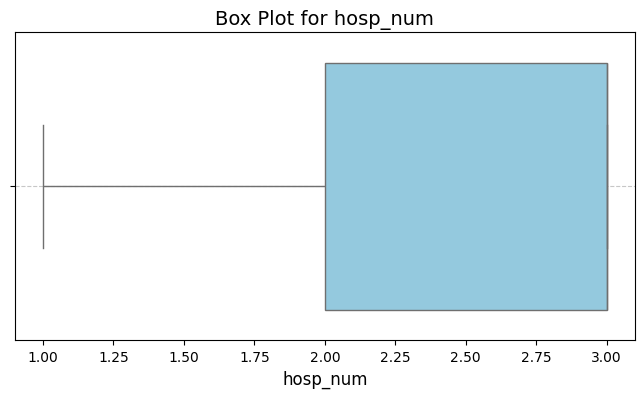

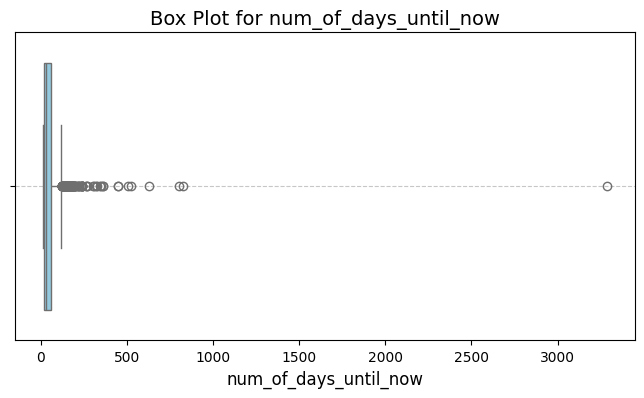

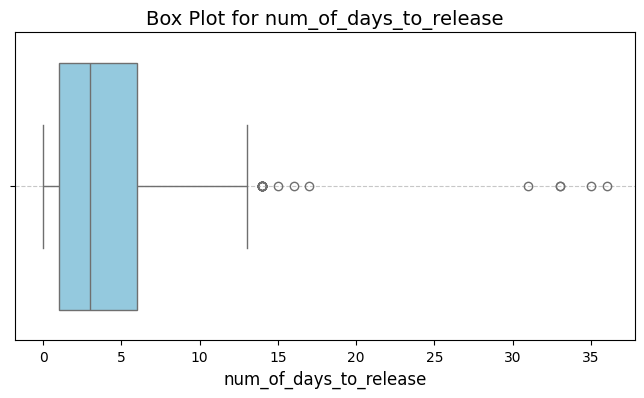

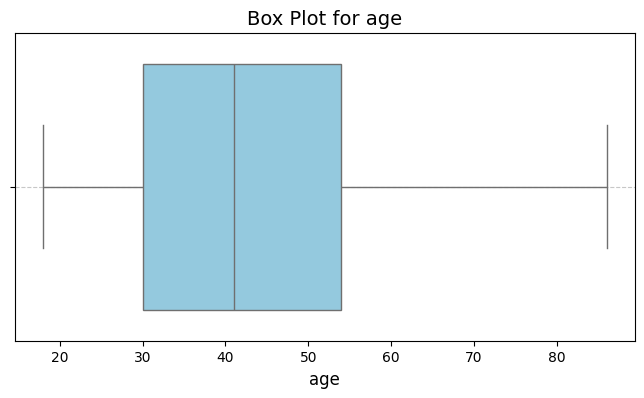

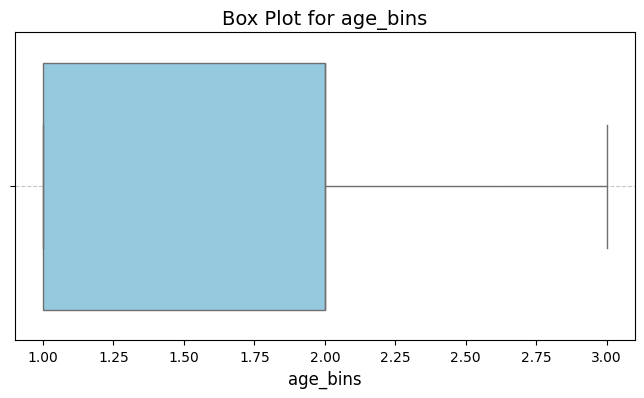

In [30]:
def plot_boxplots(df):
    """
    פונקציה ליצירת בוקס פלוט עבור כל עמודה מספרית ב-DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame המכיל את הנתונים.

    Returns:
        None: מצייר את הגרפים.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns  # עמודות מספריות בלבד

    # לולאה לכל עמודה מספרית
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=column, color='skyblue')
        plt.title(f"Box Plot for {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

plot_boxplots(df)


In [31]:
def detect_outliers(df, method='iqr', z_threshold=3):
    """
    פונקציה לזיהוי ערכים חריגים בכל העמודות בדאטה.

    Parameters:
        df (pd.DataFrame): DataFrame לבדיקת ערכים חריגים.
        method (str): 'iqr' (תחום בין-רבעוני) או 'z-score' (סטיית תקן).
        z_threshold (float): סף לזיהוי ערכים חריגים בשיטת Z-Score.

    Returns:
        dict: מילון עם שמות עמודות ומספר הערכים החריגים בכל אחת מהן.
    """
    outliers_summary = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        if method == 'iqr':
            # חישוב IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # ערכים מחוץ לתחום [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        elif method == 'z-score':
            # חישוב Z-Score
            mean = df[column].mean()
            std = df[column].std()
            outliers = df[(df[column] - mean).abs() > z_threshold * std]

        else:
            raise ValueError("Invalid method. Use 'iqr' or 'z-score'.")

        # עדכון התוצאות למילון
        outliers_summary[column] = len(outliers)

    return outliers_summary

print(detect_outliers(df, method='iqr', z_threshold=3))

{'hosp_num': 0, 'num_of_days_until_now': 109, 'num_of_days_to_release': 20, 'age': 0, 'age_bins': 0}


In [32]:
def find_outliers(df):
    """
    מזהה ערכים חריגים בטבלה ומחזיר DataFrame עם השורות שמכילות חריגים.

    Parameters:
        df (pd.DataFrame): DataFrame של הנתונים.

    Returns:
        pd.DataFrame: שורות שמכילות ערכים חריגים.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns  # בחירת עמודות מספריות בלבד
    outlier_rows = pd.DataFrame()  # יצירת DataFrame ריק לאחסון שורות חריגות

    for column in numeric_columns:
        # חישוב רבעונים וטווח IQR
        Q1 = df[column].quantile(0.25)  # רבעון תחתון
        Q3 = df[column].quantile(0.75)  # רבעון עליון
        IQR = Q3 - Q1  # טווח בין-רבעוני

        # טווח ללא חריגים
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # סינון שורות חריגות לעמודה זו
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_rows = pd.concat([outlier_rows, outliers])  # איחוד שורות חריגות

    # הסרה של שורות כפולות (אם יש עמודות חריגות בכמה עמודות שונות)
    outlier_rows = outlier_rows.drop_duplicates()

    return outlier_rows

# דוגמה לשימוש:
outliers_df = find_outliers(df)
outliers_df = outliers_df[['num_of_days_until_now']]

print(outliers_df.shape)
outliers_df.head()

(124, 1)


,num_of_days_until_now
11,3285.0
16,240.0
36,149.0
44,150.0
45,135.0


#### להריץ את המודל עם הערכים החריגים וללא הערכים החריגים ולראות האם הסרתם משפרת את המודל
```
במידה וכן אז להסיר אותם לפי השיטות הבאות:
ערכים חסרי משמעות ברורה (טעויות/שגיאות):
הסר אותם או החלף אותן ב-חסר ערך לטיפול מאוחר יותר.

ערכים נדירים אך לגיטימיים:
השאר אותם, אלא אם הם משפיעים לרעה על ביצועי המודלים.

ערכים מחוץ לסף טבעי:
תקן אותם לערכים ריאליים (למשל, באמצעות חציון או סף עליון/תחתון).
```

### מסקנה
```
לאחר בדיקה מצאנו שהערכים הם נדירים אך לגיטימיים ולכן אנו נסיר אותם ונבדוק את ביצועי המודל בלעדיהם
```

In [33]:
df_without_outliers = df

print(df_without_outliers.shape)
df_without_outliers.head()


(1031, 68)


,id,hospital,migdar,machlaka,sugmigdar,migdarmachlaka,sugmachlaka,hosp_size,hosp_owner,sector,...,q41,q42,q43,q44,q71,q72,q73,q74,q75,q76
1,129600,4,2,מיון והשהיה,מעורבת,3,1,3,1,3,...,1,1,2,2,1,1,1,1,1,1
2,129602,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,1,1,2,2,2,1,5,1,1,2
3,129603,4,2,מיון והשהיה,מעורבת,3,1,3,1,1,...,9,1,2,2,2,4,1,2,1,2
4,129605,4,1,מיון והשהיה,מעורבת,3,1,3,1,4,...,1,1,2,2,1,1,2,1,1,1
5,129606,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,2,1,2,3,2,1,1,2,1,2


In [34]:
row_index = outliers_df.index

df_without_outliers = df_without_outliers.drop(row_index)

print(df_without_outliers.shape)
df_without_outliers.head()

(907, 68)


,id,hospital,migdar,machlaka,sugmigdar,migdarmachlaka,sugmachlaka,hosp_size,hosp_owner,sector,...,q41,q42,q43,q44,q71,q72,q73,q74,q75,q76
1,129600,4,2,מיון והשהיה,מעורבת,3,1,3,1,3,...,1,1,2,2,1,1,1,1,1,1
2,129602,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,1,1,2,2,2,1,5,1,1,2
3,129603,4,2,מיון והשהיה,מעורבת,3,1,3,1,1,...,9,1,2,2,2,4,1,2,1,2
4,129605,4,1,מיון והשהיה,מעורבת,3,1,3,1,4,...,1,1,2,2,1,1,2,1,1,1
5,129606,4,1,מיון והשהיה,מעורבת,3,1,3,1,1,...,2,1,2,3,2,1,1,2,1,2


### סידור הסקאלה של שאלות הסקר

## Reverse Scaling:
#### In the survey, the lowest number represents the strongest agreement, which is the opposite of conventional scales where higher numbers usually indicate stronger agreement. To align with common interpretation and ensure consistency across the dataset, we decided to reverse the scale so that higher numbers represent stronger agreement. This adjustment makes the data more intuitive for analysis and comparison.

In [35]:
def reverse_scale(df, columns, idk_values):
    for col in columns:
        idk_value = idk_values.get(col, None)  
        min_val = df[col][df[col] != idk_value].min()  
        max_val = df[col][df[col] != idk_value].max()  

        df[col] = df[col].apply(
            lambda x: min_val - x + max_val if x != idk_value else x
        )
    return df

idk_mapping = {
    5: ['q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q15', 'q16', 
        'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q71', 
        'q72', 'q73', 'q74', 'q75', 'q76', 'q17'],
    6: ['q2', 'q14'],
    4: ['q18', 'q30', 'q33', 'q34', 'q35'],
}

columns = [col for cols in idk_mapping.values() for col in cols]  
idk_values = {col: idk_value for idk_value, cols in idk_mapping.items() for col in cols}  

df = reverse_scale(df, columns, idk_values)
df_without_outliers = reverse_scale(df_without_outliers, columns, idk_values)

## Min-Max Normalization:
#### We applied **Min-Max Normalization** to standardize the survey responses across different scales (e.g., 1-5, 1-10) into a consistent range of [0, 1], preserving the relative differences between values. "Don't Know" responses were excluded from the normalization process and assigned a fixed value of 0.5 to represent neutrality.

In [36]:
def minmax_normalization(df, columns, idk_values):

    for col in columns:
        idk_value = idk_values.get(col, None)  # Finding the min and max values, ignoring the 'Don't Know' value.
        min_val = df[col][df[col] != idk_value].min()
        max_val = df[col][df[col] != idk_value].max()
        
        # Min Max Normalization
        df[col] = df[col].apply(
            lambda x: (x - min_val) / (max_val - min_val) if x != idk_value else x
        )
        
        # המרה של 'לא יודע' ל-0.5
        df[col] = df[col].replace(idk_value, 0.5)
    return df

idk_mapping = {
    5: ['q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q15','q16','q19','q20','q21','q22','q23','q24',
        'q25','q26','q27','q28','q29','q71','q72','q73','q74','q75','q76','q17'],
    6: ['q2','q14'],
    4: ['q18','q30','q33','q34','q35'],
    11: ['q1','q36']
}

columns = [col for cols in idk_mapping.values() for col in cols]
idk_values = {col: idk_value for idk_value, cols in idk_mapping.items() for col in cols}

df = minmax_normalization(df, columns, idk_values)
df_without_outliers = minmax_normalization(df_without_outliers, columns, idk_values)


#### הגדרת הטיפוסים של העמודות

In [ ]:
# טיפול בעמודה zeman
# שלב 1: מילוי הערכים החסרים ב-99
df['zeman'] = df['zeman'].fillna(99)

# שלב 2: המרת העמודה ל-int
df['zeman'] = df['zeman'].astype("Int64")

# # שלב 3: החזרת הערכים שהיו 0 ל-NaN
df['zeman'] = df['zeman'].replace(99, np.nan)


column_types = {
    # קטגוריות עם סדר
    "q1": "category", "q2": "category", "q3": "category", "q4": "category",
    "q5": "category", "q6": "category", "q7": "category", "q8": "category",
    "q9": "category", "q10": "category", "q12": "category", "q13": "category",
    "q14": "category", "q15": "category", "q16": "category",
    "q18": "category", "q19": "category", "q20": "category", "q21": "category",
    "q22": "category", "q23": "category", "q24": "category", "q25": "category",
    "q26": "category", "q27": "category", "q28": "category", "q29": "category",
    "q30": "category", "q33": "category",
    "q34": "category", "hosp_num": "category", "hosp_time": "category",

    # מספרים 
    "yamim": "Int64",

    # מחרוזות
    "id": "string", "q37": "string", "q38": "float64",

    # קטגוריות ללא סדר
    "bet1": "category", "migdar": "category", "machlaka": "category",
    "sugmigdar": "category", "mixed": "category", "sug": "category",
    "q11": "category", "q11_1": "category", "q44": "category"
}


# שינוי הטיפוסים של העמודות בטבלה
df = df.astype(column_types)

# בדיקה שאכן הטיפוסים שונו
print(df.dtypes[["q38", "yamim", "zeman"]])


## נרמול העמודות המספריות

#### בנתיים נשאיר לזה לשלב של החיזוי

# Feature Engineering

In [ ]:
import re
from transformers import pipeline
from collections import Counter

#### יצירת עמודה שמציגה את סך ימי האשפוז שנקבעו למטופל

In [ ]:
df["total_hosp_time"] = df["num_of_days_to_release"] + df["num_of_days_until_now"]

#### הגדרת הטיפוסים של העמודות

## ניתוח עמודת q37 המדברת על הערות חופשיות של המטופל.

In [ ]:
# איחוד כל הערכים בעמודה לרשימה אחת ארוכה של מילים
all_words = ' '.join(df["q37"]).split()

# ספירת המילים
word_counts = Counter(all_words)

# המרת התוצאות ל-DataFrame לצורך ניתוח נוח יותר
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_counts_df = word_counts_df.reset_index().drop(columns="index")

word_counts_df_cleaned = word_counts_df
hebrew_stop_words = ["את", "של", "על", "עם", "זה", "מה", "הוא", "היא", "או", "אם",
        "אבל", "כי", "גם", "כן", "לא", "הם", "הן", "היה", "היו",
        "יש", "אין", "למה", "איך", "מי", "כמה", "איפה", "מתי", "יותר"]

for word in hebrew_stop_words:
   word_counts_df_cleaned = word_counts_df_cleaned.loc[word_counts_df["word"] != word, ]

word_counts_df_cleaned

In [ ]:
# פונקציית ניקוי טקסט
def clean_text_without_nltk(text):
    if not isinstance(text, str):
        return ""  # התמודדות עם ערכים חסרים או שאינם מחרוזת
    # הסרת סימני פיסוק
    text = re.sub(r'[^\w\s]', '', text)

    # חלוקה למילים
    words = text.split()

    # הסרת מילות עצירה
    words = [word for word in words if word not in hebrew_stop_words]
    return ' '.join(words)

# ניקוי העמודה
df['cleaned_comments'] = df['q37'].apply(clean_text_without_nltk)

# הצגת התוצאה
df[['q37', 'cleaned_comments']]


In [ ]:
# מילון נושאים עם מילים מייצגות
topics_dict = {
    "תעסוקה": {"תעסוקה", "פעילויות", "אחר הצהריים", "לפעילויות", "אחהצ"},
    "אוכל": {"האוכל" ,"אוכל", "טעים", "לאכול", "לאוכל:"},
    "רפואה": {"שעות", "טיפול", "הטיפול", "ריפוי", "תרופות", "התרופות"},
    "גורמי הפרעה": {"רעש", "מפריע", "בלילה", "שקט"},
    "הצוות": {"הצוות", "הרופאים", "האחיות", "רופאים", "מהרופאים:", "שהצוות", "האחים", "הרופא", 'ד"ר'}
}

# פונקציה לזיהוי נושאים ומילים מייצגות
def classify_text(text, topics_dict):
    if not isinstance(text, str):
        return {"נושא": None, "מילים מייצגות": None}
    
    # הסרת פיסוק והמרה לאותיות קטנות
    text = re.sub(r"[^\w\s]", "", text).lower()
    words = set(text.split())
    
    matched_topics = []
    matched_words = []
    
    for topic, keywords in topics_dict.items():
        intersection = words.intersection(keywords)
        if intersection:
            matched_topics.append(topic)
            matched_words.extend(intersection)
    
    return {
        "Subject_of_complaint": ", ".join(matched_topics) if matched_topics else None,
        "Representative_words": ", ".join(matched_words) if matched_words else None
    }

# החלת הסיווג על הטקסטים
df["סיווג"] = df["q37"].apply(lambda x: classify_text(x, topics_dict))

# פיצול הנתונים לעמודות
df["Subject_of_complaint"] = df["סיווג"].apply(lambda x: x["Subject_of_complaint"])
df["Representative_words"] = df["סיווג"].apply(lambda x: x["Representative_words"])

# הסרת עמודת הסיווג המאוחדת
df = df.drop(columns=["סיווג"])

# הדפסת הטבלה
Complaint_classification_df = df[["Subject_of_complaint", "Representative_words"]]
Complaint_classification_df.dropna(subset=['Subject_of_complaint'], inplace=True)

Complaint_classification_df


In [ ]:
# מילון נושאים עם מילים מייצגות
topics_dict = {
    "תעסוקה": {"תעסוקה", "פעילויות", "אחר הצהריים", "לפעילויות", "אחהצ", "אחהצ"},
    "אוכל": {"האוכל" ,"אוכל", "טעים", "לאכול", "לאוכל:"},
    "רפואה": {"שעות", "טיפול", "הטיפול", "ריפוי", "תרופות", "התרופות"},
    "גורמי הפרעה": {"רעש", "מפריע", "בלילה", "שקט"},
    "הצוות": {"הצוות", "הרופאים", "האחיות", "רופאים", "מהרופאים:", "שהצוות", "האחים", "הרופא", 'ד"ר'}
}

# פונקציה לזיהוי נושאים ומילים מייצגות
def classify_text(text, topics_dict):
    if not isinstance(text, str):
        return None  # במקרה של טקסט חסר, מחזיר None
    
    # הסרת פיסוק והמרה לאותיות קטנות
    text = re.sub(r"[^\w\s]", "", text).lower()
    words = set(text.split())
    
    matched_topics = []
    
    for topic, keywords in topics_dict.items():
        if words.intersection(keywords):
            matched_topics.append(topic)
    
    return ", ".join(matched_topics) if matched_topics else None

# יצירת עמודת סיווג בתוך הטבלה הראשית הקיימת
df["Subject_of_complaint"] = df["q37"].apply(lambda x: classify_text(x, topics_dict))

# הדפסת הטבלה לאחר העדכון
df


In [ ]:
# פונקציה לפירוק המילים והתאמתן למילים במילון
def split_and_match(row):
    subjects = row['Subject_of_complaint'].split(', ')  # פרוק המילים עם פסיקים
    words = row['Representative_words'].split(', ')
    result = []

    for subject in subjects:
        # מציאת ההתאמה למילים מתוך המילון
        for key, val in topics_dict.items():
            if subject in key:
                for word in words:
                    if word in val:
                        result.append((subject, word))
                        break  # יוצאים מהלולאה לאחר מציאת ההתאמה

    return result

# יצירת שורות חדשות
expanded_rows = []

for index, row in Complaint_classification_df.iterrows():
    matched_rows = split_and_match(row)
    for matched_row in matched_rows:
        expanded_rows.append(matched_row)


# יצירת DataFrame חדש עם השורות החדשות
Complaint_classification_df = pd.DataFrame(expanded_rows, columns=['Subject_of_complaint', 'Representative_words'])

# הצגת התוצאה
Complaint_classification_df


In [ ]:
Complaint_classification_df["Representative_words"].unique()

In [ ]:
# אתחול המודל
sentiment_pipeline = pipeline("text-classification", model="avichr/heBERT_sentiment_analysis")

# פונקציה לקיצור טקסטים מעל 512 תווים
def truncate_text(text, max_length=512):
    return text[:max_length] if isinstance(text, str) else ""

# פונקציה לניתוח רגשות עם טיפול בטקסטים ארוכים
def get_sentiment(text):
    text = truncate_text(text)  # חותך טקסטים ארוכים
    if not text.strip():  # אם הטקסט ריק אחרי חיתוך
        return "neutral"

    result = sentiment_pipeline(text)[0]['label']
    return 'positive' if result == 'LABEL_2' else 'negative' if result == 'LABEL_0' else 'neutral'

# החלת המודל על עמודת הטקסט (עם טיפול בטקסטים ארוכים)
df['character_review'] = df['q37'].apply(get_sentiment)

# הצגת דוגמאות
sentiment_df = df[['q37', 'character_review']]
sentiment_df.head()

In [ ]:
# אתחול המודל
sentiment_pipeline = pipeline("text-classification", model="onlplab/alephbert-base", return_all_scores=True)

# פונקציה לקיצור טקסטים מעל 512 תווים
def truncate_text(text, max_length=512):
    return text[:max_length] if isinstance(text, str) else ""

# פונקציה לקבלת רגש מתוך AlephBERT
def get_sentiment(text):
    text = truncate_text(text)
    
    if pd.isna(text) or text.strip() == "":  # טיפול בטקסט ריק
        return "neutral"
    
    result = sentiment_pipeline(str(text))[0]  # הפעלת המודל

    # מיפוי ההסתברויות לכל קטגוריה
    sentiment_scores = {res['label']: res['score'] for res in result}
    
    # שליפה של הקטגוריות (בדוק איך המודל מחזיר אותן בפועל)
    positive_score = sentiment_scores.get('LABEL_2', 0)
    neutral_score = sentiment_scores.get('LABEL_1', 0)
    negative_score = sentiment_scores.get('LABEL_0', 0)

    print(f"🔹 טקסט: {text}\n  📊 חיובי: {positive_score:.2f} | נייטרלי: {neutral_score:.2f} | שלילי: {negative_score:.2f}\n")

    # קביעה לפי הסבירות הגבוהה ביותר
    if positive_score > 0.5:
        return "positive"
    elif negative_score > 0.5:
        return "negative"
    else:
        return "neutral"

# החלת הניתוח על עמודת q37
df['sentiment'] = df['q37'].apply(get_sentiment)

# הצגת דוגמאות מסווגות
sentiment_df2 = df[['q37', 'character_review']]
sentiment_df2.head()